In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.plotting_context(context='paper')
sns.set_palette('rainbow')

import pandas as pd

In [2]:
sales = pd.read_csv('../../../data/mckinsey/sales.csv')

In [13]:
sales.describe()

,geoCluster,SKU,price,sales
count,4.605985e+06,4.605985e+06,778366.000000,778366.000000
mean,2.220031e+03,3.671353e+05,67.490666,3.593748
std,2.459249e+02,3.005135e+05,85.631611,4.627158
min,9.200000e+01,2.400000e+01,0.000000,0.001000
25%,2.049000e+03,3.946500e+04,24.190000,1.000000
50%,2.158000e+03,3.637130e+05,38.490000,2.500000
75%,2.269000e+03,6.427000e+05,61.890000,4.000000
max,3.230000e+03,8.381370e+05,7246.890000,801.000000


In [3]:
sales['date'] = pd.to_datetime(sales['date'])

In [4]:
start_date = sales['date'].min()
end_date = sales['date'].max()
time_range = pd.date_range(start_date, end_date)

#### Number of observations per date

<AxesSubplot:>

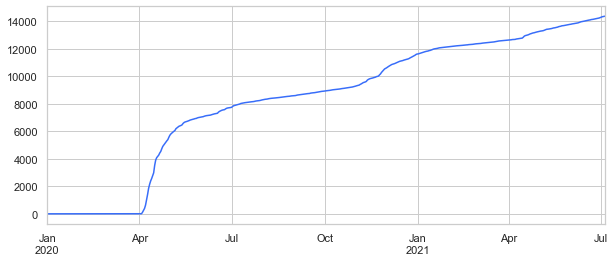

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
sales.groupby('date').count()['ID'].reindex(time_range, fill_value=0).plot(ax=ax)

#### Portion of NaN values per column

In [11]:
sales.isna().sum() / sales.shape[0]

ID            0.00000
geoCluster    0.00000
SKU           0.00000
date          0.00000
price         0.83101
sales         0.83101
dtype: float64